### Linear models for Classification
-[Different algorithms](#Different-algorithms#)
  - perceptron
  - gradient based 
  - SVM (dealing with the output parameters)


For binary classification problems, the parameters of the model are
1. weight vector $\mathbf{w}$ and bias $b$
2.  The decision rule, given a feature vector $\mathbf{z}$, is based on the calculation of
$$
g(\mathbf{z})=\mathbf{w}^T \mathbf{z}+b
$$
then,  the class/label of the example

 _ $ g(\mathbf{z})> 0$ class $A$
 
 _ $ g(\mathbf{z})< 0$ class $B$

Finally , the decision boundary/ decision surface is achieved by solving 
$$
\mathbf{w}^T \mathbf{z}+b=0
$$


In [2]:
#numeric
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
#
#Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
###########
from numpy import linalg as LA

####http://rasbt.github.io/mlxtend/


In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)


In [4]:
## The data set

X=np.array([[1,2],[2,3],[3, 3],[4,5],[5,5],[1,0],[2,1],[3,1],[5,3],[6,5]])

print(X.shape)
y=np.array([0,0,0,0,0,1,1,1,1,1])
print(y.shape)
y

(10, 2)
(10,)


array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

(-1, 6)

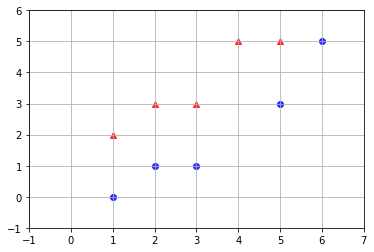

In [4]:

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.8)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.8)
plt.grid()
plt.xlim([-1, 7])
plt.ylim([-1, 6])

## Perceptron

Remark: the basic perceptron algorithm: leraning rate  (eta=0.1) . The number of iterations is max_iter.  

In [5]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=5, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)





In [6]:
ppn.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=1,
           penalty=None, random_state=0, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


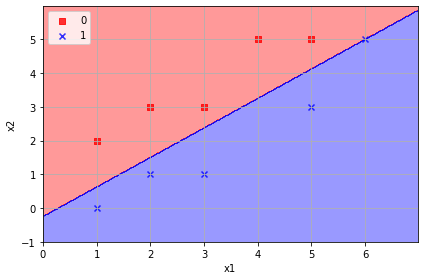

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [8]:
print('number of iteration', ppn.n_iter_)
print('weights', ppn.coef_)
print('bias',ppn.intercept_)

number of iteration 5
weights [[ 0.7 -0.8]]
bias [-0.2]


## Fisher discriminant

0.7588379160049386


(-1, 6)

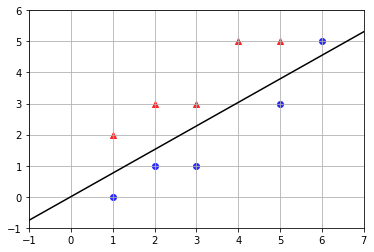

In [9]:
####  The solution with Fisher discriminant (implementation of AMT)

w=np.array([-0.0695505, 0.09165396])
b=0
#print(np.dot(X,w))


a = -w[0] / w[1]
print(a)
xx = np.linspace(-1, 7)
yy = a * xx - b / w[1]

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.8)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.8)
plt.grid()


plt.plot(xx, yy, 'k-')
plt.xlim([-1, 7])
plt.ylim([-1, 6])

### Question:

Include a function to calculate the weights for the Fisher discriminant.

## A gradient descend algorithm

In [10]:
from sklearn.linear_model import SGDClassifier


gd=SGDClassifier(loss="log", max_iter=5)

gd


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#### Remark

The algorithm is gradient based but it is not as simple as an ADALINE/LMS. Interpret the parameters. 
https://scikit-learn.org/stable/modules/sgd.html
    


c:\program files\python36\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


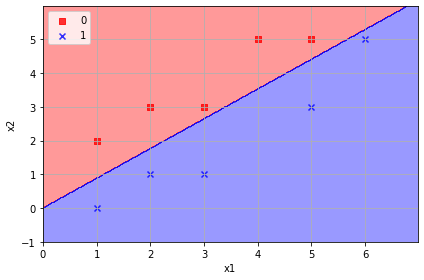

In [11]:
gd=gd.fit(X,y)

plot_decision_regions(X, y, classifier=gd)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [12]:
print('number of iteration', gd.n_iter_)
print('weights', gd.coef_)
print('bias',gd.intercept_)

number of iteration 5
weights [[ 78.23090823 -88.72471554]]
bias [0.22818944]


#### Remark: notice the value of the coefficients.   In general it is recomendable to use normalized data 
(zero mean and standard deviation 1)

## Linear SVM classifier

In [13]:
from sklearn.svm import LinearSVC

svm1=LinearSVC(C=1.0, max_iter=1000, tol=1e-05, verbose=0)
svm1

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=1e-05,
          verbose=0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


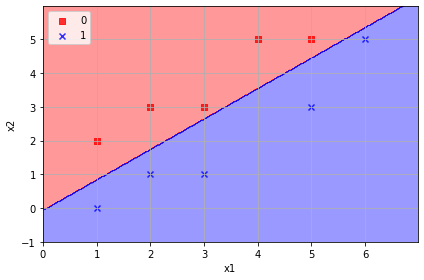

In [14]:
svm1=svm1.fit(X,y)
plot_decision_regions(X, y, classifier=svm1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [15]:
print('number of iteration', svm1.n_iter_)
print('weights', svm1.coef_)
print('bias',svm1.intercept_)



number of iteration 840
weights [[ 0.94674833 -1.0482162 ]]
bias [-0.07630884]


###  Question:

Write the code to graphically compare the four solutions (perceptron, fisher, gradient descend and linearSVM).

In [17]:
## SVM (alternative ) ( Linear SVM using the SVC )

In [18]:
from sklearn.svm import SVC

svm2=SVC(C=1.0,kernel='linear', max_iter=1000, tol=1e-05, verbose=0)
svm2

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=1e-05, verbose=0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


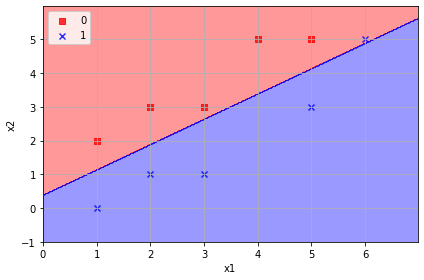

In [19]:
svm2=svm2.fit(X,y)
plot_decision_regions(X, y, classifier=svm2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [20]:

print('dual coef \n', svm2.dual_coef_)
print ('support vectors \n', svm2.support_vectors_)
print('index of support vectors \n ', svm2.support_)
print ('bias', svm2.intercept_)



dual coef 
 [[-0.12244924 -1.         -0.75510205  0.87755129  1.        ]]
support vectors 
 [[1. 2.]
 [3. 3.]
 [5. 5.]
 [2. 1.]
 [6. 5.]]
index of support vectors 
  [0 2 4 6 9]
bias [0.42857163]


### Question:

The variables printed  are related with the following decision rule
$$
g(\mathbf{z})=\sum \limits_{i=1}^{K_s} \lambda_i d_i\mathbf{x}_i^T\mathbf{z}+b
$$

In the case of the Linear kernel this description can be transformed into the general on
$$
g(\mathbf{z})= \mathbf{w}^T\mathbf{z}+b
$$

Estimate $\mathbf{w}$ with the other parameters.

### Question:

Apply the previous algorithms to a new data set.

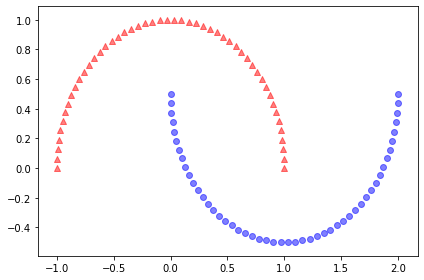

In [21]:
### 

from sklearn.datasets import make_moons

Xtoy, ytoy = make_moons(n_samples=100, random_state=123)

plt.scatter(Xtoy[ytoy == 0, 0], Xtoy[ytoy == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(Xtoy[ytoy == 1, 0], Xtoy[ytoy == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('./figures/half_moon_1.png', dpi=300)
plt.show()